In this notebook we build a random forest model using the features found to be important or slightly important during EDA, with Target Encoded categorical features

We'll use max_depth=6 and n_estimators=2 again



## Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import StratifiedKFold

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv('../Data/clean_data_3.csv')

## Important shortcuts and helper functions

In [7]:
features2=['SEX_TE', 
           'EDUCATION_TE', 
           'MARRIAGE_TE', 
           'PAY_1_TE',
           'PAY_AMT1',
           'AGE_BY10_TE', 
           'AVE_PAY', 
           'AGE/LIM', 
           'AVE_BILL_AMT',
           'AVE_BILL_AMT/LIM', 
           'AVE_PAY_AMT',
           'AVE_PAY_AMT/LIM',  
           'AVE_PAY/BILL', 
           'UNPAID_MONTHS']

## Splitting the data

In [8]:
train, val = train_test_split(df,
                              test_size=0.1,
                              stratify=df["Y"],
                              shuffle=True,
                              random_state=123)

## creating the model

In [11]:
splits=5
j=1

kfold=StratifiedKFold(n_splits=splits,
                    shuffle=True,
                    random_state=123)
    
accs=np.zeros((j,splits))
recs = np.zeros((j,splits))
for i in range(j):
    x=0
    for train_index, test_index in kfold.split(train[features2], train['Y']):

        # make random forest model with k=i+1
        rf = RandomForestClassifier(n_estimators=2,
                            max_depth=6
                                   )
        rf.fit(
                train.iloc[train_index][features2],
                train.iloc[train_index]['Y']
                    )
        pred=rf.predict(train.iloc[test_index][features2]
                        )

        # add metrics to the tables
        accs[i,x]=accuracy_score(train.iloc[test_index]['Y'], pred)
        recs[i,x]=recall_score(train.iloc[test_index]['Y'], pred, zero_division=0)
        x=x+1

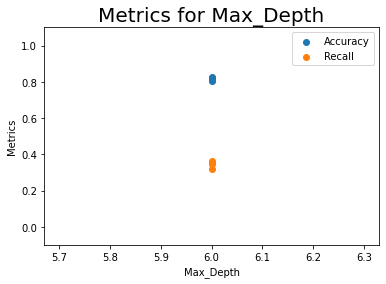

In [13]:
#plt.figure(figsize=(8,6))

plt.scatter(5*[6], 
            np.transpose(accs).reshape(1,-1),
           label='Accuracy')

plt.scatter(5*[6], 
            np.transpose(recs).reshape(1,-1),
           label='Recall')

#plt.scatter(range(2,12), np.mean(metrics[1], axis=1), label='Average')

plt.title('Metrics for Max_Depth', fontsize=20)
plt.xlabel('Max_Depth')
plt.ylabel('Metrics')
plt.ylim(-0.1,1.1)

plt.legend()

plt.show()

In [14]:
np.mean(accs[0])

0.8149629629629629

In [15]:
np.mean(recs[0])

0.34712306301381385

## testing against validation data

In [9]:
rf1= RandomForestClassifier(n_estimators=2,
                            max_depth=6
                            )

In [10]:
rf1.fit(train[features2], train['Y'])
pred1=rf1.predict(val[features2])

In [11]:
print('Accuracy score: ' + str(np.round(accuracy_score(val['Y'], pred1),4)))
print('Recall score: ' + str(np.round(recall_score(val['Y'], pred1),4)))

Accuracy score: 0.8103
Recall score: 0.3253
